# Q1. Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block. 

The attributes in the dataset are as follows; their names are self-explanatory: 
     

    longitude (continuous): One of the coordinates that are used to identify the California district block 
     

    latitude (continuous): One of the coordinates that are used to identify the California district block 
     

    housing_median_age (continuous): Average age of the house in California district block 
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block 
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block 
     

    population (continuous): Number of people residing in the district block 
     

    households (continuous): Number of families in the district block 
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value. 

## Import Libraries
Import all necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20640, 10) indicating that there are 20640 rows and 10 columns.

In [2]:
# i. Loading
df = pd.read_csv('housing.csv')

# Check the shape of the dataframe
print(df.shape)

(20640, 10)


3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20433, 10) indicating that there are 20433 rows and 10 columns.

In [3]:
# Find the missing values
print(df.isnull().sum())

# Drop the rows containing any missing value
df.dropna(inplace=True)

# Check the shape of the dataframe after dropping missing values
print(df.shape)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
(20433, 10)


4. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`. 

In [4]:
# Drop the columns 'latitude', 'longitude', and 'ocean_proximity'
corr_df = df.drop(['latitude', 'longitude', 'ocean_proximity'], axis=1)

# Find the correlation of each remaining feature with the target variable 'median_house_value'
corr_with_target = corr_df.corrwith(df['median_house_value'], method='pearson')

# Print the correlations in descending order
print(corr_with_target.sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
dtype: float64


5. Create a data frame `X` of features (by dropping the column `median_house_value` from the original data frame) using the `pandas.DataFrame.drop()` function. Create a Series object of targets `Y` (by only considering the `median_house_value` column from the original data frame (Do NOT use the `corr_df` data frame in this step. Use the data frame which was obtained as a result of step 3 above). 

In [5]:
# Create a data frame 'X' of features (by dropping the column 'median_house_value' from the original data frame)
X = df.drop(['median_house_value'], axis=1)

# Create a Series object of targets 'Y' (by only considering the 'median_house_value' column from the original data frame)
Y = df['median_house_value']

#### ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

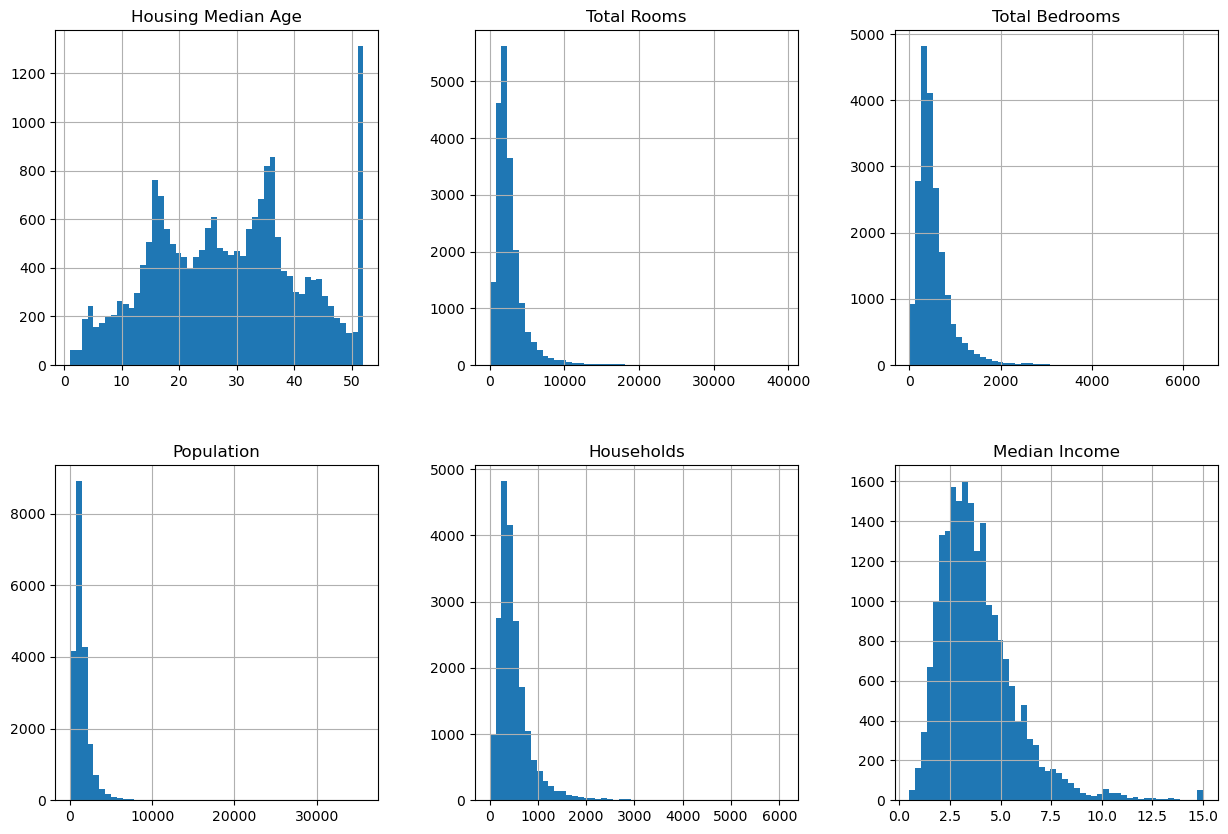

In [6]:
# Plot the histograms
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

df[['housing_median_age']].hist(bins=50, ax=axs[0][0])
axs[0][0].set_title('Housing Median Age')

df[['total_rooms']].hist(bins=50, ax=axs[0][1])
axs[0][1].set_title('Total Rooms')

df[['total_bedrooms']].hist(bins=50, ax=axs[0][2])
axs[0][2].set_title('Total Bedrooms')

df[['population']].hist(bins=50, ax=axs[1][0])
axs[1][0].set_title('Population')

df[['households']].hist(bins=50, ax=axs[1][1])
axs[1][1].set_title('Households')

df[['median_income']].hist(bins=50, ax=axs[1][2])
axs[1][2].set_title('Median Income')

plt.show()

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [7]:
# Print the mean, median and standard deviation for each feature
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity 

In [8]:
X = pd.get_dummies(X, columns=['ocean_proximity'])

#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values. 

In [10]:
# instantiate the scalers
scaler_x = StandardScaler()
scaler_y = StandardScaler()

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

In [11]:
# scale the training features
X_train = scaler_x.fit_transform(X_train)

# scale the training targets
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))

3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

In [12]:
# Scale the test features using the scaler_x
X_test = scaler_x.transform(X_test)

# Scale the test target using the scaler_y
y_train = scaler_y.transform(y_train)

4. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the `X_train` and `y_train` dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot. 

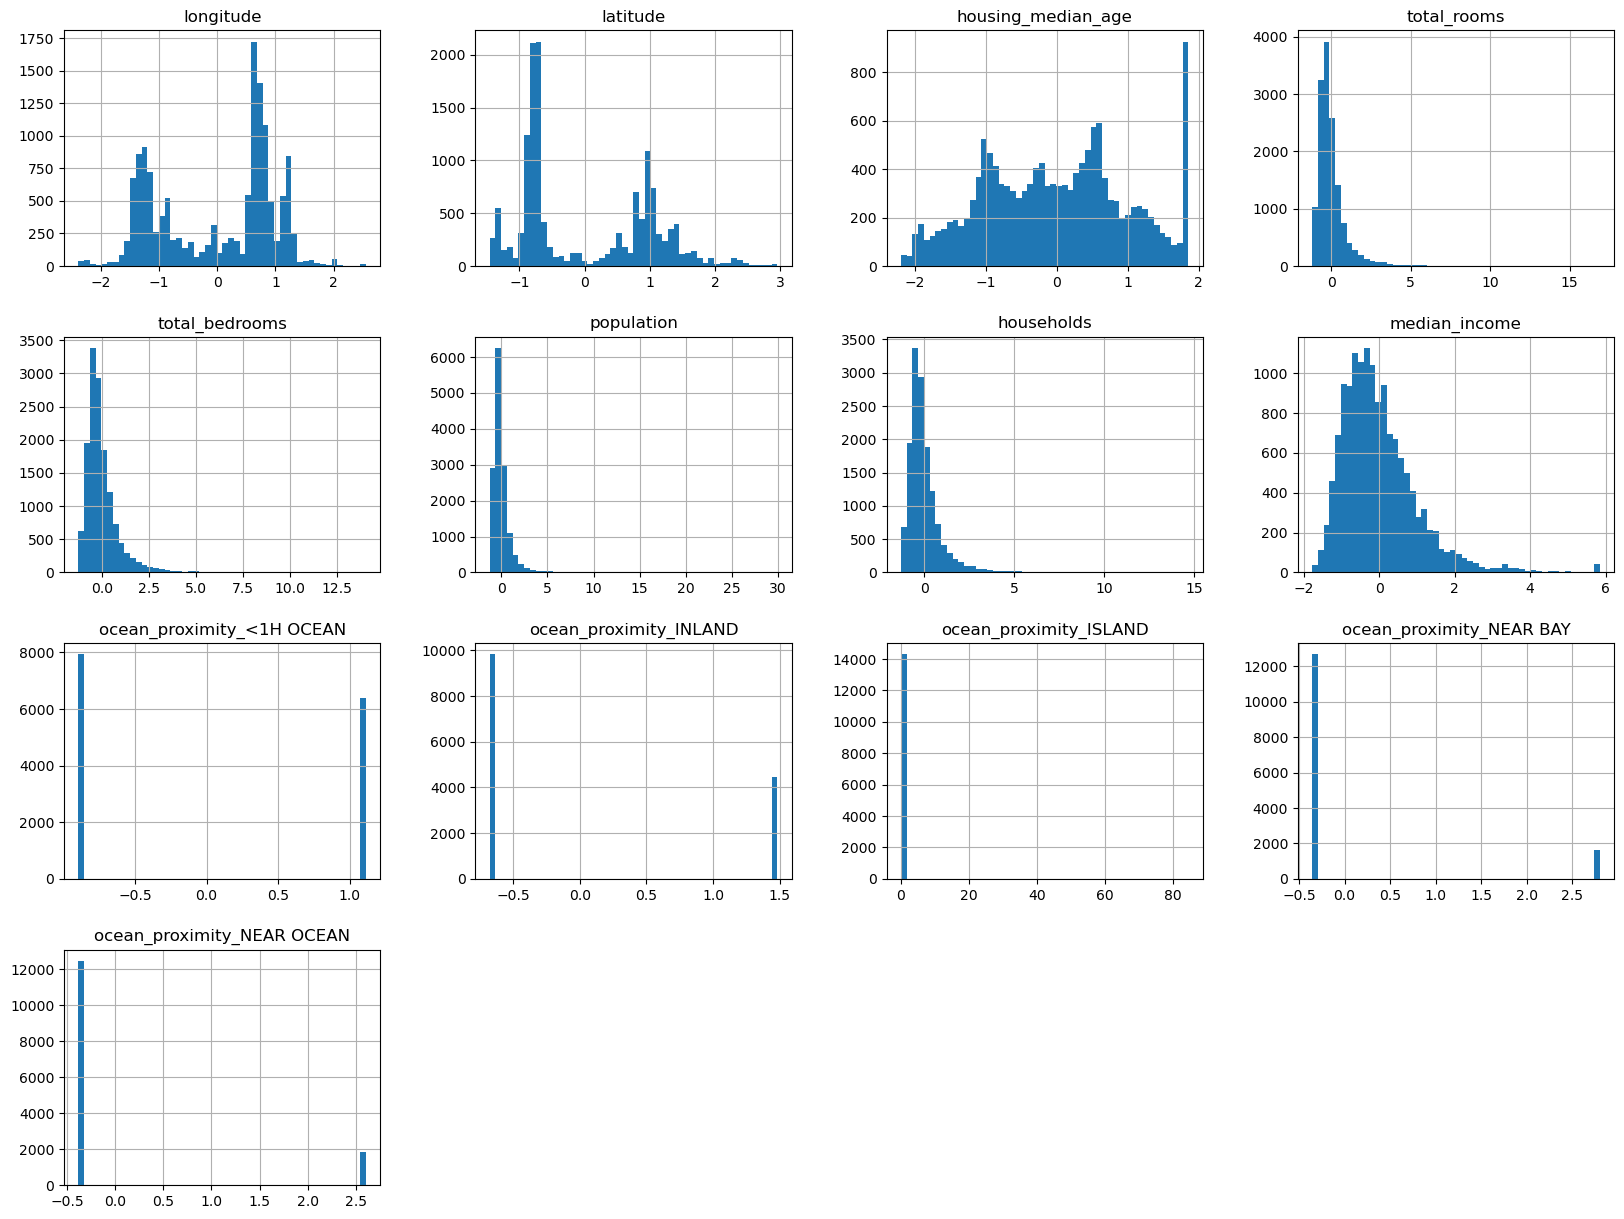

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(X_train, columns=X.columns)
df.hist(bins=50, figsize=(20,15))
plt.show()

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

In [14]:
from sklearn.linear_model import LinearRegression

# Instantiate the model
lr_model = LinearRegression()

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

In [15]:
# Fit the model using scaled X_train and y_train data
lr_model.fit(X_train, y_train)

LinearRegression()

#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space). 

In [16]:
# Obtain predictions on X_test
y_preds = lr_model.predict(X_test)

# Inverse transform the predictions to the original scale
y_preds = scaler_y.inverse_transform(y_preds)

#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [17]:
y_preds = scaler_y.inverse_transform(y_preds)

#### v. Perform PCA on the features (`X_train`) and set `n_component` as 2.

In [18]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform X_train using PCA
X_train_pca = pca.fit_transform(X_train)

1. Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis.

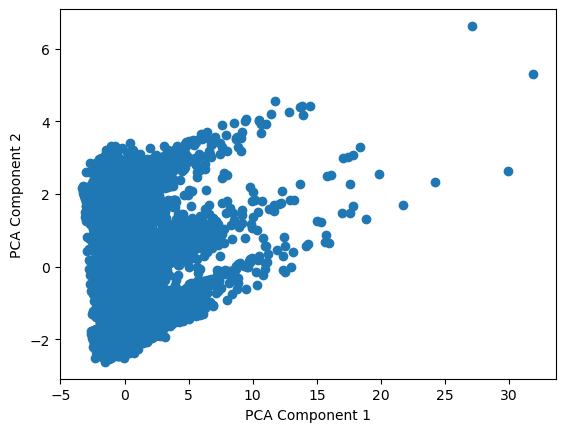

In [19]:
# Create scatter plot of first two principal components
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

2. Calculate the total percentage of variance captured by the 2 PCA components using `pca.explained_variance_ratio_`. Also, report the strength of each PCA component using `pca.singular_values_`.

In [20]:
# Perform PCA on X_train with n_components=2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Calculate the percentage of variance captured by each component
variance_ratio = pca.explained_variance_ratio_
total_variance = np.sum(variance_ratio) * 100

# Report the strength of each component
singular_values = pca.singular_values_
print(f"Total percentage of variance captured by 2 components: {total_variance:.2f}%")
print(f"Strength of first PCA component: {singular_values[0]:.2f}")
print(f"Strength of second PCA component: {singular_values[1]:.2f}")

Total percentage of variance captured by 2 components: 49.85%
Strength of first PCA component: 236.62
Strength of second PCA component: 191.60


### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

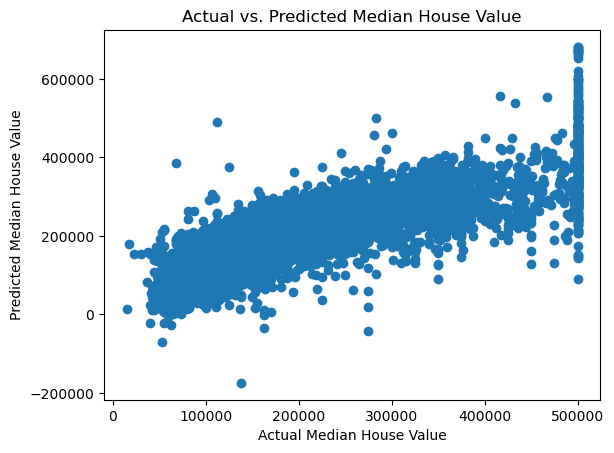

In [21]:
plt.scatter(y_test, y_preds)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs. Predicted Median House Value")
plt.show()

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.  
Hint: for RMSE set the squared parameter to False.

In [22]:
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_preds)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_preds, squared=False)

# Calculate R2
r2 = r2_score(y_test, y_preds)

print(mape)
print(r2)
print (rmse)

0.28734868914979894
0.6538753735674414
67927.63804194414


In [23]:
from tabulate import tabulate

table = [["MAPE", mape], ["RMSE", rmse], ["R2", r2]]
print(tabulate(table, headers=["Metric", "Score"]))

Metric           Score
--------  ------------
MAPE          0.287349
RMSE      67927.6
R2            0.653875
